In [289]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import tarfile
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [14]:
file_name = "languageID.tgz"
# extract tarfile
with tarfile.open(file_name) as f:
    f.extractall('./data')
    print(*f.getnames(), sep="\n")

languageID
languageID/e0.txt
languageID/e10.txt
languageID/e11.txt
languageID/e12.txt
languageID/e13.txt
languageID/e14.txt
languageID/e15.txt
languageID/e16.txt
languageID/e17.txt
languageID/e18.txt
languageID/e19.txt
languageID/e1.txt
languageID/e2.txt
languageID/e3.txt
languageID/e4.txt
languageID/e5.txt
languageID/e6.txt
languageID/e7.txt
languageID/e8.txt
languageID/e9.txt
languageID/j0.txt
languageID/j10.txt
languageID/j11.txt
languageID/j12.txt
languageID/j13.txt
languageID/j14.txt
languageID/j15.txt
languageID/j16.txt
languageID/j17.txt
languageID/j18.txt
languageID/j19.txt
languageID/j1.txt
languageID/j2.txt
languageID/j3.txt
languageID/j4.txt
languageID/j5.txt
languageID/j6.txt
languageID/j7.txt
languageID/j8.txt
languageID/j9.txt
languageID/s0.txt
languageID/s1.txt
languageID/s10.txt
languageID/s11.txt
languageID/s12.txt
languageID/s13.txt
languageID/s14.txt
languageID/s15.txt
languageID/s16.txt
languageID/s17.txt
languageID/s18.txt
languageID/s19.txt
languageID/s2.txt
langu

In [150]:
file_names = [f"e{i}.txt" for i in range(20)] + [f"s{i}.txt" for i in range(20)] + [f"j{i}.txt" for i in range(20)]
data = dict()
for file in file_names:
    with open("data/languageID/" + file) as f:
        lines = f.read()
        counts = pd.Series(list(lines)).value_counts()
        for l in list("abcdefghijklmnopqrstuvwxyz "):
            if l not in counts:
                counts[l] = 0
        data[file] = counts#.append([counts,file[0]])

In [154]:
char_set = list("abcdefghijklmnopqrstuvwxyz ")
trainX = np.array([data[f"e{i}.txt"][char_set].to_numpy() for i in range(10)] + 
                  [data[f"s{i}.txt"][char_set].to_numpy() for i in range(10)] + 
                  [data[f"j{i}.txt"][char_set].to_numpy() for i in range(10)])
trainy = ['e' for _ in range(10)] + ['s' for _ in range(10)] + ['j' for _ in range(10)]

In [195]:
def estimate_θ(X,y,l,α=0.5):
    
    character_counts = np.zeros(len(X[0]))
    for i,lang in enumerate(y):
        if lang == l:
            character_counts += X[i]
    
    
    return (character_counts + α) / (sum(character_counts) + (len(X) * α))

In [196]:
θe = estimate_θ(trainX, trainy,'e')
θs = estimate_θ(trainX, trainy,'s')
θj = estimate_θ(trainX, trainy,'j')

print("θe:\n", θe, "\n")
print("θs:\n", θs, "\n")
print("θj:\n", θj, "\n")

θe:
 [0.06016255 0.01113387 0.02150786 0.0219704  0.10535879 0.01893088
 0.0174772  0.04721158 0.05540505 0.00142064 0.00373332 0.02897449
 0.02051672 0.05791595 0.06445751 0.01675036 0.00056165 0.05381922
 0.0661755  0.08011762 0.02666182 0.00928373 0.01549491 0.00115634
 0.013843   0.00062773 0.17923219] 

θs:
 [1.04550780e-01 8.23210212e-03 3.75223531e-02 3.97422458e-02
 1.13800333e-01 8.60208423e-03 7.18381945e-03 4.53228094e-03
 4.98550903e-02 6.62884627e-03 2.77486588e-04 5.29382747e-02
 2.58062527e-02 5.41715484e-02 7.24856632e-02 2.42646605e-02
 7.67712894e-03 5.92896343e-02 6.57643214e-02 3.56107788e-02
 3.36992045e-02 5.88888204e-03 9.24955294e-05 2.49737929e-03
 7.86212000e-03 2.68237035e-03 1.68249368e-01] 

θj:
 [1.31751799e-01 1.08657676e-02 5.48529103e-03 1.72245126e-02
 6.01984487e-02 3.87813570e-03 1.40102019e-02 3.17587869e-02
 9.70232688e-02 2.34085668e-03 5.74033960e-02 1.43246454e-03
 3.97945636e-02 5.67046328e-02 9.11536580e-02 8.73453986e-04
 1.04814478e-04 4.279

In [170]:
e10_test = data['e10.txt'][char_set].to_numpy()
print("e10.txt bag of words vector:\n", e10_test)

e10.txt bag of words vector:
 [164  32  53  57 311  55  51 140 140   3   6  85  64 139 182  53   3 141
 186 225  65  31  47   4  38   2 498]


In [235]:
likelihoode = sum(np.log(θe) * e10_test)
likelihoods = sum(np.log(θs) * e10_test)
likelihoodj = sum(np.log(θj) * e10_test)

print("p(x|y=e): ", likelihoode)
print("p(x|y=s): ", likelihoods)
print("p(x|y=j): ", likelihoodj)

p(x|y=e):  -7842.140503641569
p(x|y=s):  -8467.538730975977
p(x|y=j):  -8771.723954496762


In [284]:
test_files = [f"e{i}.txt" for i in range(10,20)] + \
             [f"s{i}.txt" for i in range(10,20)] + \
             [f"j{i}.txt" for i in range(10,20)]

pred_key = {0 : "e", 1 : "s", 2 : "j"}
for file in test_files:
    xtest = data[file][char_set].to_numpy()
    likelihoods = [sum(np.log(θe) * xtest), sum(np.log(θs) * xtest), sum(np.log(θj) * xtest)]
    actual = file[0]
    pred = pred_key[np.argmax(likelihoods)]
    print(f"actual: {actual} predicted: {pred}")

actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: e predicted: e
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: s predicted: s
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j
actual: j predicted: j


In [307]:
random_test_sample = test_files[np.random.randint(len(test_files))]
sample_str = ""
with open("data/languageID/" + random_test_sample) as f:
    lines = f.read()
    sample_str+= lines

random_mix = np.random.randint(len(sample_str), size=len(sample_str))

bag_words_random = pd.Series(np.array(list(sample_str))[random_mix]).value_counts()
for l in list("abcdefghijklmnopqrstuvwxyz "):
    if l not in bag_words_random:
        bag_words_random[l] = 0

bag_words_random = bag_words_random[char_set]

likelihoode = sum(np.log(θe) * bag_words_random)
likelihoods = sum(np.log(θs) * bag_words_random)
likelihoodj = sum(np.log(θj) * bag_words_random)

print(random_test_sample)
print("p(x|y=e): ", likelihoode)
print("p(x|y=s): ", likelihoods)
print("p(x|y=j): ", likelihoodj)

j16.txt
p(x|y=e):  -4444.224164501575
p(x|y=s):  -4863.46921351848
p(x|y=j):  -4006.392191792224


In [251]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1 - sigmoid(z))

def softmax(z):
    return np.exp(z) / sum(np.exp(z))

def softmax_prime(z):
    return softmax(z) - (np.exp(2*z) / sum(np.exp(z))**2)

def train(W0, X, y, epochs=10, a=0.2):
    W1,W2,W3 = W0[0], W0[1], W0[2]
    z1 = W1@X
    a1 = sigmoid(z1)
    z2 = W2@a1
    a2 = sigmoid(z2)
    z3 = W3 @ a2
    yhat = g(z3)
    
    print(z1.shape, a1.shape, z2.shape, a2.shape, z3.shape, yhat.shape)
#     for i in range(epochs):
#         W3 -= a*(-sum(y/yhat))*softmax(z3)*

In [259]:
mnist = datasets.MNIST(root='./data', download=True, transform=None).train_data.numpy()
mnist[0].shape

(28, 28)

In [309]:
def get_data_loader(training = True):
    custom_transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    train_set=datasets.MNIST('./data',train=True,
                download=True,transform=custom_transform)
    test_set=datasets.MNIST('./data', train=False,
                transform=custom_transform)
    if training:
        loader = torch.utils.data.DataLoader(train_set, batch_size = 64)
    else:
        loader = torch.utils.data.DataLoader(test_set, batch_size = 64)
    
    return loader

def build_model(d1,d2,):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, d1),
        nn.Sigmoid(),
        nn.Linear(d1, d2),
        nn.Sigmoid(),
        nn.Linear(d2, 10),
        nn.Softmax()
    )
    return model

def train_model(model, train_loader, T, a=0.01):
    model.train()
    opt = optim.SGD(model.parameters(), lr=a)
    batches = []
    accuracy = []
    losses = []
    for epoch in range(T):
        running_loss = 0.0
        for i, data in enumerate(train_loader):
            inputs, labels = data
            opt.zero_grad()
            outputs = model(inputs)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            opt.step()
            running_loss += loss.item()
        
        correct = 0
        total = 0
        with torch.no_grad():
            for data in train_loader:
                inputs, labels = data
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        batch_size = inputs.shape[0]
        ds_length = len(train_loader.dataset)
        loss = batch_size * running_loss / ds_length
        print(f"Train Epoch: {epoch} Accuracy {correct}/{total}({correct*100/total:.2f}%) Loss: {loss:.3f}")
        batches.append(batch_size)
        accuracy.append(correct/total)
        losses.append(loss)
    return batches, accuracy, losses
    


def evaluate_model(model, test_loader, show_loss = True):
    model.eval()
    running_loss = 0.0
    for i, data in enumerate(test_loader):
        inputs, labels = data
        outputs = model(inputs)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        running_loss += loss.item()
        
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    ds_length = len(test_loader.dataset)
    loss = running_loss / ds_length
    if show_loss:
        print(f"Average loss: {loss:.4f}")
    print(f"Accuracy: {correct}/{total}  {correct*100/total:.2f}%")
    


def predict_label(model, test_images, index):
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7' '8', '9']
    logits = model(test_images[index])
    prob = F.softmax(logits, dim=1)
    idxs = np.argsort(list(prob.detach().numpy()))[0][-3:]
    for i in np.flip(idxs):
        print(f"{class_names[i]}: {prob[0][i]*100:.2f}%")

In [283]:
model = build_model(300,200)
loader = get_data_loader()
learning_stats = train_model(model, loader, 50)

Train Epoch: 0 Accuracy 29318/60000(48.86%) Loss: 1.134
Train Epoch: 1 Accuracy 33252/60000(55.42%) Loss: 1.034
Train Epoch: 2 Accuracy 40350/60000(67.25%) Loss: 0.741
Train Epoch: 3 Accuracy 45734/60000(76.22%) Loss: 0.508
Train Epoch: 4 Accuracy 48888/60000(81.48%) Loss: 0.393
Train Epoch: 5 Accuracy 50709/60000(84.52%) Loss: 0.321
Train Epoch: 6 Accuracy 51867/60000(86.44%) Loss: 0.273
Train Epoch: 7 Accuracy 52628/60000(87.71%) Loss: 0.241
Train Epoch: 8 Accuracy 53128/60000(88.55%) Loss: 0.220
Train Epoch: 9 Accuracy 53464/60000(89.11%) Loss: 0.204
Train Epoch: 10 Accuracy 53759/60000(89.60%) Loss: 0.192
Train Epoch: 11 Accuracy 53976/60000(89.96%) Loss: 0.183
Train Epoch: 12 Accuracy 54157/60000(90.26%) Loss: 0.176
Train Epoch: 13 Accuracy 54340/60000(90.57%) Loss: 0.169
Train Epoch: 14 Accuracy 54493/60000(90.82%) Loss: 0.164
Train Epoch: 15 Accuracy 54636/60000(91.06%) Loss: 0.159
Train Epoch: 16 Accuracy 54774/60000(91.29%) Loss: 0.155
Train Epoch: 17 Accuracy 54883/60000(91.4

In [278]:
loader = get_data_loader(training=False)
evaluate_model(model, loader)

Average loss: 0.0061
Accuracy: 8901/10000  89.01%


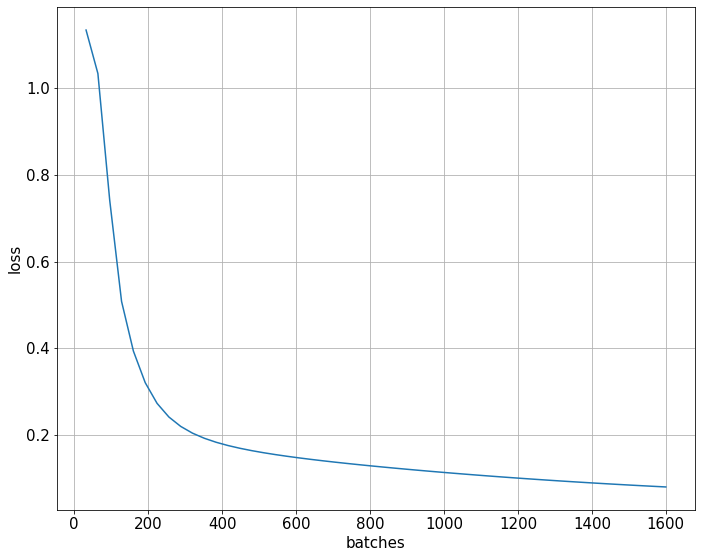

In [316]:
plt.rcParams["font.size"] = 15
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(learning_stats[0]), learning_stats[2])
plt.grid()
plt.ylabel("loss")
plt.xlabel("batches")
plt.savefig("learning_curve1.png")
plt.tight_layout()
None

In [318]:
def init_weights(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.data.fill_(0)
        print(m.weight)

model = build_model(300,200)
model.apply(init_weights)
loader = get_data_loader()
learning_stats = train_model(model, loader, 25)

Flatten(start_dim=1, end_dim=-1)
Linear(in_features=784, out_features=300, bias=True)
Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Sigmoid()
Linear(in_features=300, out_features=200, bias=True)
Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Sigmoid()
Linear(in_features=200, out_features=10, bias=True)
Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
  

C:\Users\ECLEO\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Train Epoch: 0 Accuracy 6742/60000(11.24%) Loss: 1.152
Train Epoch: 1 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 2 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 3 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 4 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 5 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 6 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 7 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 8 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 9 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 10 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 11 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 12 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 13 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 14 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 15 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 16 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 17 Accuracy 6742/60000(11.24%) Loss: 1.151
Tr

In [319]:
model = build_model(300,200)
loader = get_data_loader()
learning_stats = train_model(model, loader, 20)

Train Epoch: 0 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 1 Accuracy 6742/60000(11.24%) Loss: 1.151
Train Epoch: 2 Accuracy 6742/60000(11.24%) Loss: 1.150
Train Epoch: 3 Accuracy 6742/60000(11.24%) Loss: 1.149
Train Epoch: 4 Accuracy 6742/60000(11.24%) Loss: 1.148
Train Epoch: 5 Accuracy 7225/60000(12.04%) Loss: 1.147
Train Epoch: 6 Accuracy 11932/60000(19.89%) Loss: 1.143
Train Epoch: 7 Accuracy 12594/60000(20.99%) Loss: 1.135
Train Epoch: 8 Accuracy 12612/60000(21.02%) Loss: 1.121
Train Epoch: 9 Accuracy 13366/60000(22.28%) Loss: 1.108
Train Epoch: 10 Accuracy 16106/60000(26.84%) Loss: 1.098
Train Epoch: 11 Accuracy 17088/60000(28.48%) Loss: 1.089
Train Epoch: 12 Accuracy 17620/60000(29.37%) Loss: 1.081
Train Epoch: 13 Accuracy 20690/60000(34.48%) Loss: 1.073
Train Epoch: 14 Accuracy 22558/60000(37.60%) Loss: 1.064
Train Epoch: 15 Accuracy 23294/60000(38.82%) Loss: 1.053
Train Epoch: 16 Accuracy 24162/60000(40.27%) Loss: 1.042
Train Epoch: 17 Accuracy 27528/60000(45.88%) Lo

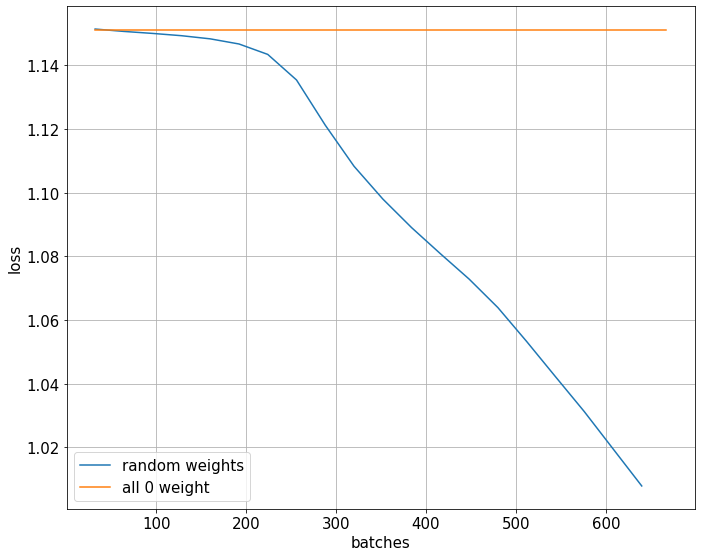

In [322]:
plt.rcParams["font.size"] = 15
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(learning_stats[0]), learning_stats[2], label="random weights")
plt.plot(np.cumsum(learning_stats[0:20]), [1.151 for i in range(60)], label="all 0 weight")
plt.grid()
plt.legend()
plt.ylabel("loss")
plt.xlabel("batches")
plt.savefig("learning_curve2.png")
plt.tight_layout()
None

In [ ]:
loader = get_data_loader(training=False)
evaluate_model(model, loader)